In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle



In [65]:
ml_df=pd.read_csv("outlier_handled.csv")

In [66]:
# List of columns to remove (columns not in the features you want to keep)
columns_to_remove = ['Model', 'Variant Id', 'Insurance Validity', 'RTO', 'Max Power', 'Torque', 
                     'Color', 'No. of Cylinders', 'Length', 'Width', 'Height', 'Gear Box', 
                     'Cargo Volume', 'car_links']

# Drop the specified columns
ml = ml_df.drop(columns=columns_to_remove)

# Display the cleaned DataFrame (with only the features you need for the ML model)
print(ml)

      Fuel Type  Body Type  Kms Driven  Transmission Type  No. of Owners  OEM  \
0             4          2    120000.0                  1              3   20   
1             4          7     32706.0                  1              2    6   
2             4          2     11949.0                  1              1   29   
3             4          8     17794.0                  1              1    9   
4             1          7     60000.0                  1              1   20   
...         ...        ...         ...                ...            ...  ...   
6278          1          7     51122.0                  1              1   17   
6279          1          2     96094.0                  1              4    6   
6280          4          2     42891.0                  0              1   20   
6281          1          7     59100.0                  1              1   27   
6282          4          7     55913.0                  0              1   29   

      Model Year     Price 

In [67]:
# Separate features and target variable
X = ml.drop(['Price'], axis=1)  # Features
y = ml['Price']  # Target variable
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5026, 12)
y_train shape: (5026,)
X_test shape: (1257, 12)
y_test shape: (1257,)


In [70]:

# 1. Linear Regression - Model Fit and Predict
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

In [76]:
# 2. Random Forest Regressor - GridSearchCV and Model Fit/Predict
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)





OSError: [Errno 22] Invalid argument

In [ ]:
# 3. Gradient Boosting Regressor - GridSearchCV and Model Fit/Predict
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 10]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

In [15]:
# 4. Decision Tree Regressor - GridSearchCV and Model Fit/Predict
dt_model = DecisionTreeRegressor(random_state=42)
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [18]:
# Evaluate Models
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")
    print()

print("Evaluating all models:")
evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)
evaluate_model("Gradient Boosting Regressor", y_test, y_pred_gb)
evaluate_model("Decision Tree Regressor", y_test, y_pred_dt)

Evaluating all models:
Linear Regression Evaluation:
MAE: 130019.34
MSE: 36155625046.94
R²: 0.70

Random Forest Regressor Evaluation:
MAE: 67968.76
MSE: 12289933701.17
R²: 0.90

Gradient Boosting Regressor Evaluation:
MAE: 63274.33
MSE: 9868796525.55
R²: 0.92

Decision Tree Regressor Evaluation:
MAE: 90691.89
MSE: 19254296891.12
R²: 0.84



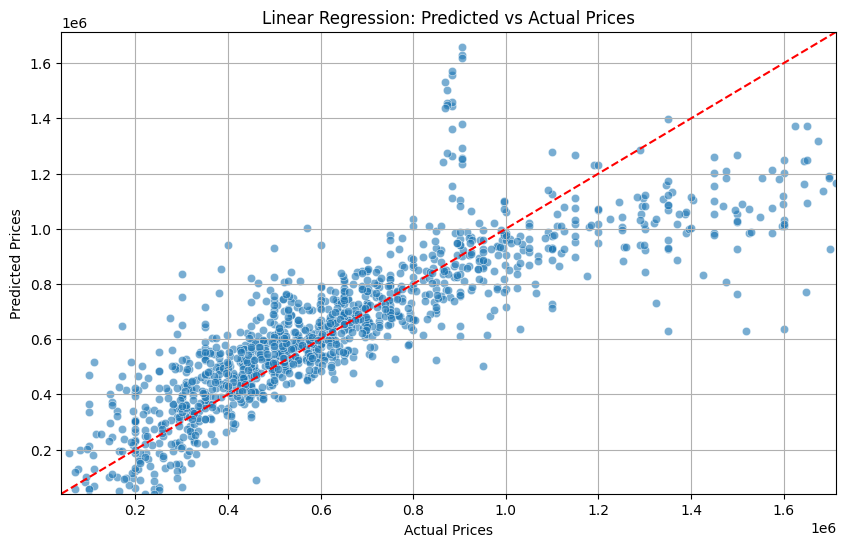

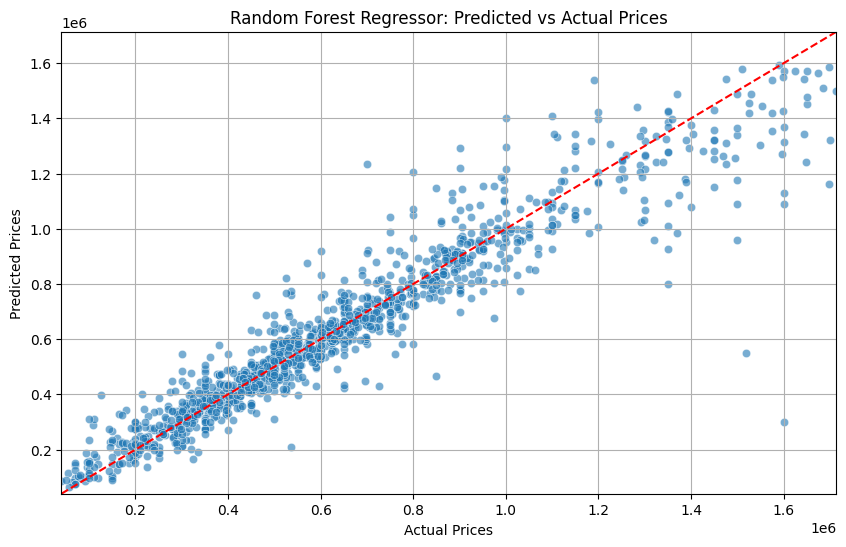

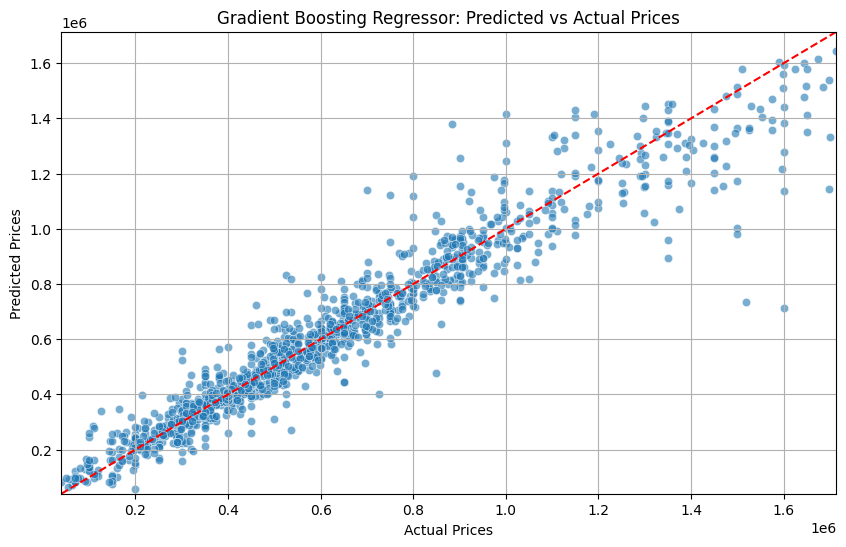

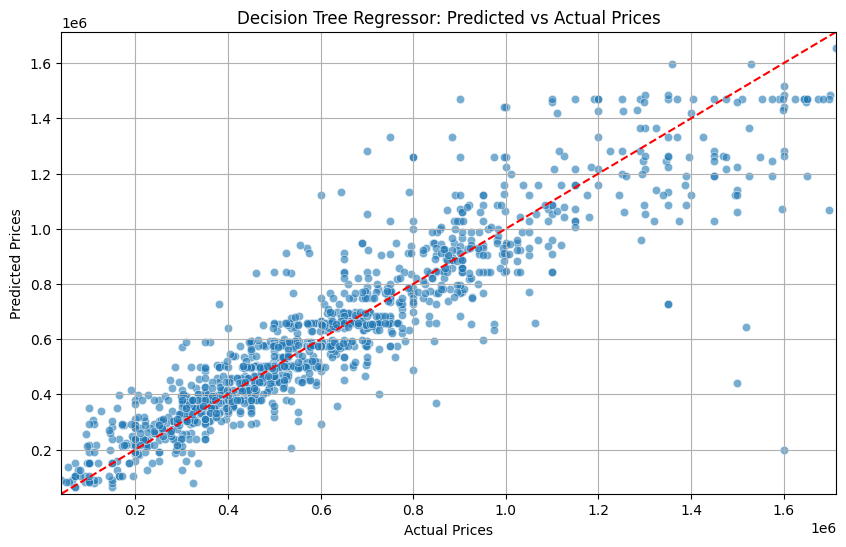

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    
    # Plot the line for perfect prediction
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
    plt.title(f"{model_name}: Predicted vs Actual Prices")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())
    plt.grid()
    plt.show()

# Plot for each model
plot_predicted_vs_actual(y_test, y_pred_lin, "Linear Regression")
plot_predicted_vs_actual(y_test, y_pred_rf, "Random Forest Regressor")
plot_predicted_vs_actual(y_test, y_pred_gb, "Gradient Boosting Regressor")
plot_predicted_vs_actual(y_test, y_pred_dt, "Decision Tree Regressor")


In [32]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Assuming you've already fitted your Gradient Boosting model with the following code
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 10]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

# Provided data as a dictionary
data = {
    'Fuel Type': 4,
    'Body Type': 2,
    'Kms Driven': 120000,
    'Transmission Type': 1,
    'No. of Owners': 3,
    'OEM': 20,
    'Model': 156,
    'Model Year': 2015,
    'Variant Id': 3979,
    'Insurance Validity': 1,
    'Seats': 5,
    'RTO': 170,
    'Engine Displacement': 998,
    'Mileage': 23.1,
    'Max Power': 67.04,
    'Torque': 90,
    'Color': 15,
    'No. of Cylinders': 3,
    'Length': 3715,
    'Width': 1635,
    'Height': 2425,
    'Gear Box': 5,
    'Cargo Volume': 400,
    'car_links': 4940,
    'City': 0,
    'Car Age': 9
}

# Actual price (replace this with your actual value)
actual_price = 400000  # Replace with the actual price of the car

# Convert the dictionary to a DataFrame
input_Data = pd.DataFrame(list(data.items()), columns=['Feature', 'Value'])

# Reshape input data to match the format of X_train
input_Data = input_Data.set_index('Feature').T

# Make predictions using the trained model
predicted_price = best_gb_model.predict(input_Data)

# Display the actual and predicted prices
print(f"Actual Price: {actual_price:.2f}")
print(f"Predicted Price: {predicted_price[0]:.2f}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Actual Price: 400000.00
Predicted Price: 337309.43


In [34]:
# Step 5: Model Training with Hyperparameter Tuning
gbr = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Step 6: Model Evaluation
y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")



Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
R2 Score: 0.9199959996040155
RMSE: 97836.72524129893


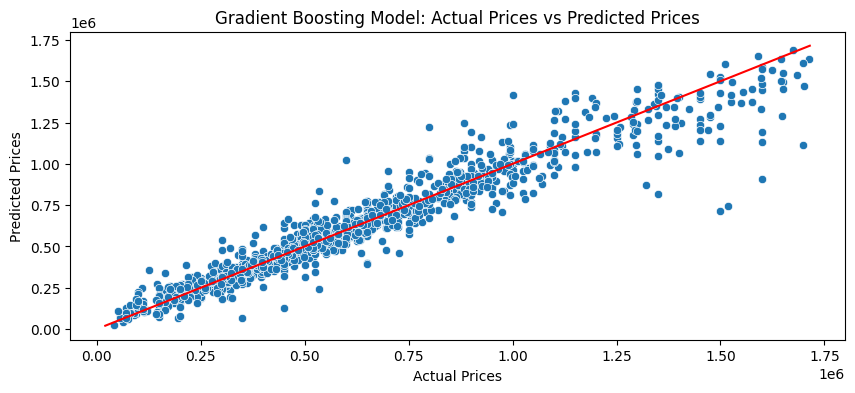

In [35]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Model: Actual Prices vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Diagonal line for reference
plt.show()

In [36]:
# Save the model

# Save the model
with open("ml_model.pkl", 'wb') as f:
    pickle.dump(gb_grid_search, f)



In [37]:
# Load the model from the file
with open('ml_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

# Make predictions using the loaded model
predicted_price_pickle = saved_model.predict(input_Data)

# Display the actual and predicted prices to verify they match
print(f"Actual Price: {actual_price:.2f}")
print(f"Predicted Price from Pickle Model: {predicted_price_pickle[0]:.2f}")


Actual Price: 400000.00
Predicted Price from Pickle Model: 337309.43
